In [11]:
import json
import numpy as np
cam_cal_data_path = '/Users/zhenqihe/Desktop/横乐/hanglok-robotics/nerf/processed_07_06_18_40/transforms.json'
cali_data = json.load(open(cam_cal_data_path))

In [3]:
len(cali_data)

17

In [5]:
len(cali_data['frames'])

43

In [10]:
frames

[{'file_path': './images/0008.png',
  'sharpness': 117.70375865190292,
  'transform_matrix': [[-0.3421424110911639,
    0.5523416917091037,
    0.7601692089227651,
    3.0282755085947013],
   [0.7245255472621258,
    0.670209851135902,
    -0.16087724141378476,
    -0.5391128977822237],
   [-0.5983321000302065,
    0.49571908483957594,
    -0.6294928808659144,
    -3.3491120532930183],
   [0.0, 0.0, 0.0, 1.0]]},
 {'file_path': './images/0034.png',
  'sharpness': 75.9552212793986,
  'transform_matrix': [[0.09193076443541914,
    -0.033322754097700844,
    0.9952076811757814,
    3.9105697764494773],
   [0.9947403457739697,
    0.048410487093476375,
    -0.09026665624058085,
    0.1925683179538311],
   [-0.04517055501576214,
    0.9982715156009334,
    0.03759790101848211,
    0.12208108275302056],
   [0.0, 0.0, 0.0, 1.0]]},
 {'file_path': './images/0028.png',
  'sharpness': 131.4243494747009,
  'transform_matrix': [[-0.43421290741922025,
    -0.5508940331611977,
    0.7127235897032939,


In [7]:
frames = cali_data['frames']

In [19]:
l = np.array(frames[0]['transform_matrix'])@np.array([[0],[0],[0],[1]])

In [22]:
l[1]

array([-0.5391129])

In [8]:
file_names = [i['file_path'][-8:] for i in frames]

In [13]:
file_names.index('0034.png')

1

In [2]:
import os
import numpy as np
import math
import cv2
import json
from utils import *
import argparse
import glob
import logging
from datetime import datetime
import random
import glob
import matplotlib.pyplot as plt

# aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_4X4_1000)
# board = aruco.GridBoard_create(
#     markersX=5,
#     markersY=7,
#     markerLength=0.04,
#     markerSeparation=0.01,
#     dictionary=aruco_dict)

In [23]:
calibration_data_path = '/Users/zhenqihe/Desktop/横乐/hanglok-robotics/calibration/saved_07_06_16_38'
imgP = os.path.join(calibration_data_path,'1.png')

In [3]:
world_coor = np.zeros((4,3),dtype=np.float32)
world_coor[1,:] = [0,0,0]
world_coor[2,:] = [0,1,0]
world_coor[3,:] = [1,1,0]
world_coor[0,:] = [1,0,0]
world_coor

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.]], dtype=float32)

In [15]:
def cal_camera_extrinsic(img_path,aruco_dict=aruco.getPredefinedDictionary(aruco.DICT_4X4_100),intr_matrix= np.array([[912.266, 0, 637.773],[0, 911.672, 375.817],[0,0,1]], dtype = "double")):
    ## the distortion coefficients of our camera is zero
    distCoeffs = np.zeros((5,1))

    img = cv2.imread(img_path)

    status = False
    R_target2camera = None
    rvec = None
    T_target2camera = None
    parameters =  aruco.DetectorParameters()
    detector = aruco.ArucoDetector(aruco_dict, parameters)
    markerCorners, markerIds, rejectedCandidates = detector.detectMarkers(img)

    world_coor = np.zeros((4,3),dtype=np.float32)
    world_coor[1,:] = [0,0,0]
    world_coor[2,:] = [0,1,0]
    world_coor[3,:] = [1,1,0]
    world_coor[0,:] = [1,0,0]
    

    
    # if successfully detected 4 corner points
    if markerIds is not None:
        if markerCorners[0][0].shape[0] == 4:
            corners = np.zeros((4,2))
            corners[0,:] = markerCorners[0][0][0]
            corners[1,:] = markerCorners[0][0][1]
            corners[2,:] = markerCorners[0][0][2]
            corners[3,:] = markerCorners[0][0][3]
            # markerCorners = markerCorners[0][0].transpose(3,0,1,2)
            retval, rvec, T_target2camera = cv2.solvePnP(world_coor, markerCorners[0][0], intr_matrix, distCoeffs,flags=cv2.SOLVEPNP_IPPE_SQUARE)
            print(markerCorners)
            # retval, rvec, T_target2camera = cv2.solvePnP(world_coor, corners, intr_matrix, distCoeffs )
            # print(corners)
            # retval, mtx, dist, rvec, T_target2camera = cv2.calibrateCamera(objectPoints=[np.float32(world_coor)], imagePoints=[np.float32(corners)], imageSize=(1280,720),cameraMatrix=intr_matrix, distCoeffs=distCoeffs )
            # print(mtx)
            # print(dist)
            # print(rvec[0][0])
            if retval:
                R_target2camera = angle2rotation(rvec[0][0],rvec[1][0],rvec[2][0])
                # R_target2camera = angle2rotation(rvec[0][0],rvec[0][1],rvec[0][2])
                # T_target2camera = T_target2camera[0]
                status = True
                # print(rvec)
    return status,R_target2camera,T_target2camera
calibration_data_path = r'C:\Users\HP\Desktop\hzq\hanglok-robotics\calibration\saved_07_14_17_05'
imgP = os.path.join(calibration_data_path,'2.png')
status,R_target2camera,T_target2camera = cal_camera_extrinsic(imgP)

(array([[[782., 453.],
        [845., 645.],
        [650., 700.],
        [599., 499.]]], dtype=float32),)


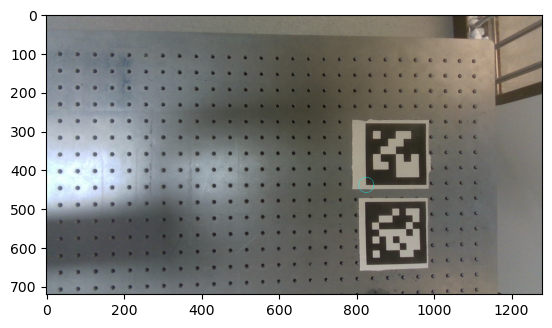

In [31]:
aruco_dict4x4=aruco.getPredefinedDictionary(aruco.DICT_4X4_100)
aruco_dict6x6=aruco.getPredefinedDictionary(aruco.DICT_6X6_100)
aruco_dict7x7=aruco.getPredefinedDictionary(aruco.DICT_7X7_100)
intr_matrix= np.array([[912.266, 0, 637.773],[0, 911.672, 375.817],[0,0,1]], dtype = "double")

parameters =  aruco.DetectorParameters()
detector6x6 = aruco.ArucoDetector(aruco_dict6x6, parameters)
detector7x7 = aruco.ArucoDetector(aruco_dict7x7, parameters)

data_path = r"C:\Users\HP\Desktop\hzq\hanglok-robotics\calibration\saved_07_14_17_24"
img_lists = glob.glob(os.path.join(data_path,'*.png'))

img_path = img_lists[12]

img = cv2.imread(img_path)

markerCorners6x6, markerIds6x6, rejectedCandidates = detector6x6.detectMarkers(img)
markerCorners7x7, markerIds7x7, rejectedCandidates = detector7x7.detectMarkers(img)

cv2.circle(img, tuple(np.uint32(markerCorners6x6[0][0][2])), 20, (0, 255, 255))
if len(markerCorners7x7) > 0:
    cv2.circle(img, tuple(np.uint32(markerCorners7x7[0][0][0])), 20, (0, 0, 255))

plt.imshow(img)

In [ ]:
rejectedCandidates

In [62]:
world_coor = np.zeros((4,3),dtype=np.float32)
world_coor[0,:] = [0,1,0]
world_coor[1,:] = [1,1,0]
world_coor[2,:] = [1,0,0]
world_coor[3,:] = [0,0,0]

distCoeffs =  np.zeros((5,1))
retval, rvec, T_target2camera = cv2.solvePnP(world_coor, markerCorners6x6[0][0], intr_matrix, distCoeffs,flags=cv2.SOLVEPNP_IPPE_SQUARE)
R_target2camera = angle2rotation(rvec[0][0],rvec[1][0],rvec[2][0])
matrix_w2c = np.row_stack((np.column_stack((R_target2camera,T_target2camera)),np.array([0,0,0,1])))
matrix_c2w = np.linalg.inv(matrix_w2c)
c_p = matrix_w2c@np.array([0,0,0,1])
c_p

# intr_matrix4x4 = np.row_stack((np.column_stack((intr_matrix,np.zeros((1,3)))),np.array([0,0,0,0])))
pix_cor = intr_matrix@c_p[:3]
pix_cor

array([4734.63217256, 1609.30006138,    5.73697011])

array([ 6.20452788,  1.94629649, -1.5928287 ,  1.        ])

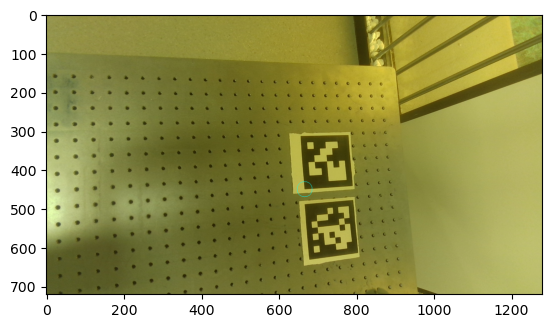

In [72]:
aruco_dict4x4=aruco.getPredefinedDictionary(aruco.DICT_4X4_100)
aruco_dict6x6=aruco.getPredefinedDictionary(aruco.DICT_6X6_100)
aruco_dict7x7=aruco.getPredefinedDictionary(aruco.DICT_7X7_100)
intr_matrix= np.array([[912.266, 0, 637.773],[0, 911.672, 375.817],[0,0,1]], dtype = "double")

parameters =  aruco.DetectorParameters()
detector6x6 = aruco.ArucoDetector(aruco_dict6x6, parameters)
detector7x7 = aruco.ArucoDetector(aruco_dict7x7, parameters)

data_path = r"C:\Users\HP\Desktop\hzq\hanglok-robotics\calibration\saved_07_14_17_24"
img_lists = glob.glob(os.path.join(data_path,'*.png'))

img_path = img_lists[0]

img = cv2.imread(img_path)

markerCorners6x6, markerIds6x6, rejectedCandidates = detector6x6.detectMarkers(img)
markerCorners7x7, markerIds7x7, rejectedCandidates = detector7x7.detectMarkers(img)

cv2.circle(img, tuple(np.uint32(markerCorners6x6[0][0][2])), 20, (0, 255, 255))
if len(markerCorners7x7) > 0:
    cv2.circle(img, tuple(np.uint32(markerCorners7x7[0][0][0])), 20, (0, 0, 255))

plt.imshow(img)

world_coor = np.zeros((4,3),dtype=np.float32)
world_coor[0,:] = [0,1,0]
world_coor[1,:] = [1,1,0]
world_coor[2,:] = [1,0,0]
world_coor[3,:] = [0,0,0]

distCoeffs =  np.zeros((5,1))
retval, rvec, T_target2camera = cv2.solvePnP(world_coor, markerCorners6x6[0][0], intr_matrix, distCoeffs,flags=cv2.SOLVEPNP_IPPE_SQUARE)
R_target2camera = angle2rotation(rvec[0][0],rvec[1][0],rvec[2][0])
matrix_w2c = np.row_stack((np.column_stack((R_target2camera,T_target2camera)),np.array([0,0,0,1])))
matrix_c2w = np.linalg.inv(matrix_w2c)
c_p = matrix_c2w@np.array([0,0,0,1])
c_p

# intr_matrix4x4 = np.row_stack((np.column_stack((intr_matrix,np.zeros((1,3)))),np.array([0,0,0,0])))
# pix_cor = intr_matrix@c_p[:3]
# pix_cor

In [53]:
matrix_c2w@np.array([0,0,0,1])

array([-6.0518113 ,  0.45087103, -1.31832789,  1.        ])

In [52]:
matrix_c2w@matrix_w2c

array([[ 1.00000000e+00,  1.04083409e-17, -3.46944695e-18,
        -8.88178420e-16],
       [ 2.77555756e-17,  1.00000000e+00, -5.55111512e-17,
         4.44089210e-16],
       [-1.38777878e-17,  0.00000000e+00,  1.00000000e+00,
        -4.44089210e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [37]:
markerCorners6x6[0][0][3]

array([825., 281.], dtype=float32)

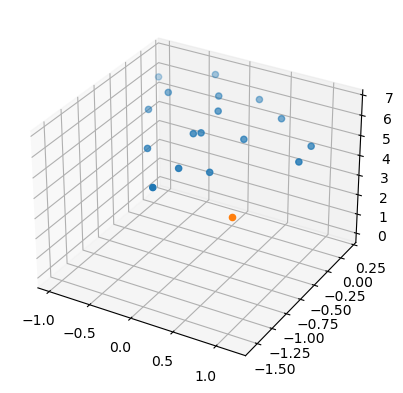

In [76]:


distCoeffs =  np.zeros((5,1))
c_p_list = []
for img in img_lists:
    img = cv2.imread(img)

    markerCorners6x6, markerIds6x6, rejectedCandidates = detector6x6.detectMarkers(img)
    markerCorners7x7, markerIds7x7, rejectedCandidates = detector7x7.detectMarkers(img)
    world_coor = np.zeros((4,3),dtype=np.float32)
    world_coor[0,:] = [0,1,0]
    world_coor[1,:] = [1,1,0]
    world_coor[2,:] = [1,0,0]
    world_coor[3,:] = [0,0,0]

    # cv2.circle(img, tuple(np.uint32(markerCorners6x6[0][0][2])), 20, (0, 255, 255))
    if len(markerCorners6x6) > 0:
        retval, rvec, T_target2camera = cv2.solvePnP(world_coor, markerCorners6x6[0][0], intr_matrix, distCoeffs,flags=cv2.SOLVEPNP_IPPE_SQUARE)
        R_target2camera = angle2rotation(rvec[0][0],rvec[1][0],rvec[2][0])
        matrix_w2c = np.row_stack((np.column_stack((R_target2camera,T_target2camera)),np.array([0,0,0,1])))
        matrix_c2w = np.linalg.inv(matrix_w2c)
        # print(matrix_c2w)
        c_p = matrix_w2c@np.array([0,0,0,1])
        c_p_list.append(c_p)
camera_posX = [i[0] for i in c_p_list]
camera_posY = [i[1] for i in c_p_list]
camera_posZ = [i[2] for i in c_p_list]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(camera_posX, camera_posY, camera_posZ, 'green')
ax.scatter([0], [0], [0], 'black')
# ax.scatter(COLMAP_camera_posX, COLMAP_camera_posY, COLMAP_camera_posZ, 'red')
plt.show()



In [77]:
c_p_list

[array([ 0.14242618, -0.45883676,  6.67761358,  1.        ]),
 array([-0.50128781, -0.39925082,  6.7542819 ,  1.        ]),
 array([-0.65910453, -0.51491027,  6.01694962,  1.        ]),
 array([-0.98380119,  0.08305519,  5.91025098,  1.        ]),
 array([0.26277968, 0.08244802, 6.10661797, 1.        ]),
 array([ 0.64721822, -0.09776953,  6.00587325,  1.        ]),
 array([ 0.14627678, -0.7476753 ,  6.32293195,  1.        ]),
 array([-0.0327173 , -0.20129716,  6.62136243,  1.        ]),
 array([-0.31276403, -0.99009221,  5.64078299,  1.        ]),
 array([ 0.18743438, -1.56869805,  5.81633105,  1.        ]),
 array([ 0.50711842, -0.54509682,  5.92215647,  1.        ]),
 array([ 1.1792038 , -0.59972318,  5.73697011,  1.        ]),
 array([ 1.1286697 , -0.30334633,  5.70052267,  1.        ]),
 array([ 0.40689418, -0.97007324,  5.26757853,  1.        ]),
 array([ 0.20434374, -1.18947236,  5.77773567,  1.        ]),
 array([ 0.0922328 , -0.79926891,  6.34854795,  1.        ]),
 array([-0.3

In [60]:
len(img_lists)

18

In [ ]:
calibration_data_path = '/Users/zhenqihe/Desktop/横乐/hanglok-robotics/calibration/saved_07_06_16_38'
imgP = os.path.join(calibration_data_path,'2.png')
status,R_target2camera,T_target2camera = cal_camera_extrinsic(imgP)

In [14]:
matrix_c2w = np.row_stack((np.column_stack((R_target2camera,T_target2camera)),np.array([0,0,0,1])))
matrix_c2w = np.linalg.inv(matrix_c2w)
c_p = matrix_c2w@np.array([[0],[0],[0],[1]])

c_p

array([[-4.56988273],
       [-0.84445375],
       [-1.22926005],
       [ 1.        ]])

In [1]:
import os
import numpy as np
import math
import cv2
import json
from utils import *
import argparse
import glob
import logging
from datetime import datetime
import random
import glob
import matplotlib.pyplot as plt


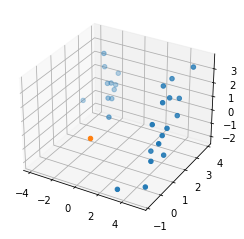

In [108]:

if 1:
  


    input_data_path = '/Users/zhenqihe/Desktop/横乐/hanglok-robotics/nerf/processed_07_06_18_40'
    calibration_data_path = '/Users/zhenqihe/Desktop/横乐/hanglok-robotics/calibration/saved_07_06_16_38'
    COLMAP_JSON_DIR = '/Users/zhenqihe/Desktop/横乐/hanglok-robotics/nerf/processed_07_06_18_40/transforms.json'

    input_image_path = os.path.join(input_data_path,'images')
    output_json_path_vison_method = os.path.join(input_data_path,'points_vision_method.json')
    output_json_path_COLMAP = os.path.join(input_data_path,'points_COLMAP.json')
    position_txt_path = os.path.join(calibration_data_path,'position.txt')
    position_info = read_position(position_txt_path)
    transforms_frames = read_transformsJSON_data(COLMAP_JSON_DIR)
    COLMAP_file_names = [i['file_path'][-8:] for i in transforms_frames]

    assert len(glob.glob(os.path.join(input_image_path,'*.png'))) == len(position_info), 'Wrong Input'+ str(len(position_info)) +'  '+str(len(glob.glob(os.path.join(input_image_path,'*.png'))))

    c2w_matrices_list = []
    camera_posX = []
    camera_posY = []
    camera_posZ = []

    COLMAP_camera_posX = []
    COLMAP_camera_posY = []
    COLMAP_camera_posZ = []

    for i in range(len(position_info)):
        
        if len(str(i)) == 1:
            image_name = '000'+str(i)+'.png'
        elif len(str(i)) == 2:
            image_name = '00'+str(i)+'.png'
        elif len(str(i)) == 3:
            image_name = '0'+str(i)+'.png'
        else:
            continue
        
        if image_name not in COLMAP_file_names:
            continue
        else:
            COLMAP_c2w_matrix = np.array(transforms_frames[COLMAP_file_names.index(image_name)]['transform_matrix'])
            COLMAP_camera_p = COLMAP_c2w_matrix@np.array([[0],[0],[0],[1]])
            COLMAP_camera_posX.append(COLMAP_camera_p[0])
            COLMAP_camera_posY.append(COLMAP_camera_p[1])
            COLMAP_camera_posZ.append(COLMAP_camera_p[2])
        img_path = os.path.join(input_image_path,image_name)
        calibrate_image_name = os.path.join(calibration_data_path,str(i)+'.png')
        status,R_target2camera,T_target2camera = cal_camera_extrinsic(calibrate_image_name)
        # print(status)
        if status:
            matrix_c2w = np.row_stack((np.column_stack((R_target2camera,T_target2camera)),np.array([0,0,0,1])))
            matrix_c2w =  np.linalg.inv(matrix_c2w)
            camera_p = matrix_c2w@np.array([[0],[0],[0],[1]])
            camera_posX.append(camera_p[0])
            camera_posY.append(camera_p[1])
            camera_posZ.append(camera_p[2])
            
            c2w_matrices_list.append(matrix_c2w)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(camera_posX, camera_posY, camera_posZ, 'green')
    ax.scatter([0], [0], [0], 'black')
    # ax.scatter(COLMAP_camera_posX, COLMAP_camera_posY, COLMAP_camera_posZ, 'red')
    plt.show()
# main()

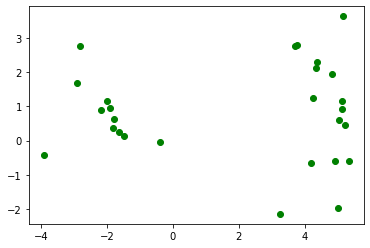

In [109]:
if 1:
    camera_posX_minus = [(-1)*i for i in camera_posX]
    plt.scatter(camera_posX, camera_posZ, color='green')
    # ax.scatter([0], [0], 'black')
    # ax.scatter(COLMAP_camera_posX, COLMAP_camera_posY, 'red')
    plt.show()

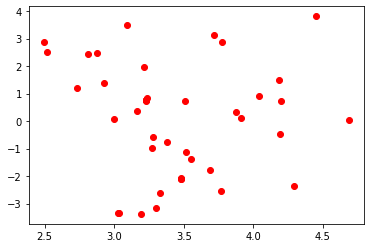

In [84]:
if 1:
    COLMAP_camera_posY_minus = [(-1)*i for i in COLMAP_camera_posY]
    COLMAP_camera_posX_m = [i-2.5 for i in COLMAP_camera_posX]
    plt.scatter(COLMAP_camera_posX, COLMAP_camera_posZ, color='red')
    # ax.scatter([0], [0], 'black')
    # ax.scatter(COLMAP_camera_posX, COLMAP_camera_posY, 'red')
    plt.show()

In [67]:
COLMAP_camera_posY_minus = [(-1)*i for i in COLMAP_camera_posY]
COLMAP_camera_posY_minus[0]-1

array([-1.56488463])

In [19]:
cp_int = np.zeros((5 * 5, 3), np.float32)
cp_int[:, :2] = np.mgrid[0:5, 0:5].T.reshape(-1, 2)
cp_world = cp_int * 0.02

In [20]:
cp_world.shape

(25, 3)

In [14]:
cp_int

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.]], dtype=float32)

In [17]:
world_coor = np.zeros((4,3),dtype=np.float32)
world_coor[1,:] = [0.5,0.5,0]
world_coor[2,:] = [0.5,-0.5,0]
world_coor[3,:] = [-0.5,-0.5,0]
world_coor[0,:] = [-0.5,0.5,0]

world_coor

array([[-0.5,  0.5,  0. ],
       [ 0.5,  0.5,  0. ],
       [ 0.5, -0.5,  0. ],
       [-0.5, -0.5,  0. ]], dtype=float32)

In [18]:
world_coor.shape

(4, 3)

In [98]:
import glob
import os
# import pandas as pd

image_path = '/Users/zhenqihe/Library/Containers/com.tencent.xinWeChat/Data/Library/Application Support/com.tencent.xinWeChat/2.0b4.0.9/bfffd59dc4bb3b39a8ba45cede543f34/Message/MessageTemp/719ab4bb5ad56d9d4098e03bc583f0d8/File/0'
image_list = glob.glob(os.path.join(image_path,'*.jpg'))

f = open('/Users/zhenqihe/Desktop/CUHK/xinyang/detected_img_info.csv','w')
# f.write('diary_id,post_id,image_id'+'\n')

c  = ''
l = []
for n,img in enumerate(image_list):
    img_name = img.split('/')[-1][:-4]
    img_name_split = img_name.split('_')
    l.append(img_name_split[1])
    # c = str(img_name_split[0]) + ',' + str(img_name_split[1]) + ',' + str(img_name_split[2]) + '\n'
#     f.write(c)

# f.close()



In [101]:
for i in range(len(l)):
    if l[i] in l[i+1:]:
        print(l[i])

5944116
4348008
5490316
6117826
7060724


In [92]:
!pip install pandas

In [90]:
image_list[0].split('/')[-1][:-4]

'13410680_6006489_6'